In [1]:
import pandas as pd
import json
import geopy.distance
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta, date, datetime
import math

In [2]:
from geopy import distance

In [3]:
bear_data=pd.read_csv("Polar_bear_data.csv")
bear_data
# print(bear_data.columns)

,BearID_mcp,DateTimeUTC_mcp,Date,latitude_mcp,longitude_mcp
0,1,5/3/1992 22:12,1992-05-03,74.005,-125.453
1,1,5/9/1992 23:54,1992-05-09,74.325,-125.857
2,1,5/24/1992 21:26,1992-05-24,74.099,-125.188
3,1,5/25/1992 0:18,1992-05-25,74.148,-125.214
4,1,6/7/1992 23:08,1992-06-07,73.470,-125.055
...,...,...,...,...,...
56963,308,6/8/2010 19:03,2010-06-08,72.516,-145.572
56964,308,6/9/2010 18:44,2010-06-09,72.572,-144.761
56965,308,6/10/2010 18:21,2010-06-10,72.395,-144.526
56966,308,6/11/2010 18:52,2010-06-11,72.152,-143.876


In [4]:
bear_num = bear_data.groupby(['BearID_mcp'])
grouped_bears = bear_num['BearID_mcp'].count()
grouped_bears

BearID_mcp
1        7
2       88
3      102
4       26
5      173
      ... 
304    164
305     35
306    388
307     60
308     49
Name: BearID_mcp, Length: 299, dtype: int64

In [5]:
# df_gb.sort_values, ascending=False).head(20)
top_20 = grouped_bears.nlargest(20)
top20_bearids = top_20.index.to_list()
top20_bearids

[32,
 281,
 7,
 52,
 144,
 302,
 89,
 160,
 50,
 139,
 114,
 129,
 207,
 135,
 204,
 38,
 213,
 294,
 250,
 179]

In [6]:
len(top20_bearids)

20

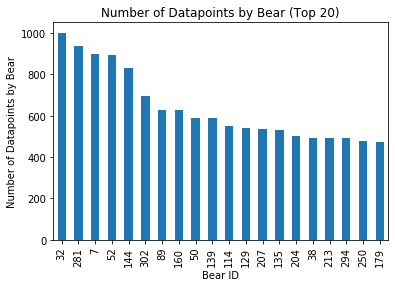

<Figure size 432x288 with 0 Axes>

In [7]:
top_20 = grouped_bears.nlargest(20)
bear_chart = top_20.plot(kind="bar", title="Number of Datapoints by Bear (Top 20)", align="center")
bear_chart.set_xlabel('Bear ID')
bear_chart.set_ylabel("Number of Datapoints by Bear")
# plt.xticks(rotation=45)
plt.show()
plt.tight_layout()
plt.savefig("./output_data/bear_datapoints.jpg")

In [8]:
#Find min/max datapoints

max_dpts = bear_data[['BearID_mcp','Date']].groupby('BearID_mcp').max()
min_dpts =bear_data[['BearID_mcp','Date']].groupby('BearID_mcp').min()

In [9]:
#Create new columns for first/last datapoints and dropna's

bear_data['First datapoint'] = pd.to_datetime(min_dpts['Date'])
bear_data['Last datapoint'] = pd.to_datetime(max_dpts['Date'])

clean_bear = bear_data.dropna()
clean_bear

,BearID_mcp,DateTimeUTC_mcp,Date,latitude_mcp,longitude_mcp,First datapoint,Last datapoint
1,1,5/9/1992 23:54,1992-05-09,74.325,-125.857,1992-05-03,1992-06-14
2,1,5/24/1992 21:26,1992-05-24,74.099,-125.188,1986-05-02,1987-06-18
3,1,5/25/1992 0:18,1992-05-25,74.148,-125.214,1989-11-03,1990-05-25
4,1,6/7/1992 23:08,1992-06-07,73.470,-125.055,1991-04-09,1991-05-05
5,1,6/13/1992 21:57,1992-06-13,73.450,-125.002,1985-05-12,1987-04-04
...,...,...,...,...,...,...,...
304,5,9/11/1985 0:21,1985-09-11,71.990,-148.570,2009-05-09,2009-10-19
305,5,9/12/1985 1:56,1985-09-12,71.990,-148.566,2009-08-21,2009-10-03
306,5,9/13/1985 0:04,1985-09-13,72.084,-148.581,2006-04-04,2008-06-22
307,5,9/14/1985 22:01,1985-09-14,72.219,-148.867,2016-04-22,2016-06-20


In [10]:
clean_bear.dtypes

BearID_mcp                  int64
DateTimeUTC_mcp            object
Date                       object
latitude_mcp              float64
longitude_mcp             float64
First datapoint    datetime64[ns]
Last datapoint     datetime64[ns]
dtype: object

In [ ]:
# (top_20['Last datapoint'].dt.date - top_20['First datapoint'].dt.date).dt.days

In [11]:
#Bear 32 - 6728 days,?? started 1988-89, then restarted 2004 /  Bear# 281 - 1293 days

# days_observ = (clean_bear['Last datapoint'].dt.date - clean_bear['First datapoint'].dt.date).dt.days.nlargest(20)
days_observ = (clean_bear['Last datapoint'].dt.date - clean_bear['First datapoint'].dt.date).dt.days
days_observ

1       42
2      412
3      203
4       26
5      692
      ... 
304    163
305     43
306    810
307     59
308     48
Length: 299, dtype: int64

In [12]:
days_observ[top20_bearids[0]]

6729

In [13]:
top20_bearids[0]

32

In [14]:
top20_daysobser = []

for i in top20_bearids:
    d= days_observ[i]
    top20_daysobser.append([i, d])
    
top20_daysobser

[[32, 6729],
 [281, 1294],
 [7, 4134],
 [52, 5821],
 [144, 3164],
 [302, 1849],
 [89, 1608],
 [160, 1541],
 [50, 3929],
 [139, 5117],
 [114, 1189],
 [129, 1882],
 [207, 877],
 [135, 881],
 [204, 582],
 [38, 3795],
 [213, 845],
 [294, 762],
 [250, 2228],
 [179, 2261]]

In [15]:
df = pd.DataFrame(top20_daysobser)
df.columns= ["Bear Id", "Days Observ"]
df.index = df["Bear Id"]
del df["Bear Id"]
df

,Days Observ
Bear Id,
32,6729
281,1294
7,4134
52,5821
144,3164
302,1849
89,1608
160,1541
50,3929


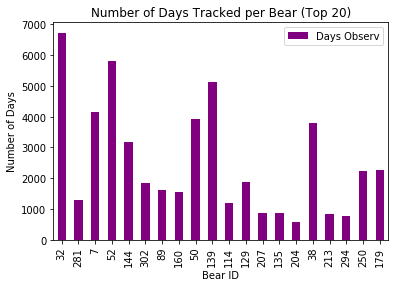

<Figure size 432x288 with 0 Axes>

In [16]:
#  CODE for top 20 bears number of days datapoints were recorded

days_tracked = df.plot(kind="bar", color= "purple", title="Number of Days Tracked per Bear (Top 20)", align="center")
days_tracked.set_xlabel('Bear ID')
days_tracked.set_ylabel("Number of Days")
# plt.xticks(rotation=45)
plt.show()
plt.tight_layout()
plt.savefig("./output_data/days_tracked.png")

In [17]:
min_dpts

,Date
BearID_mcp,
1,1992-05-03
2,1986-05-02
3,1989-11-03
4,1991-04-09
5,1985-05-12
...,...
304,2009-05-09
305,2009-08-21
306,2006-04-04


In [18]:
## BEAR DISTANCE TRAVELED SECTION

In [19]:
bear1_loc = (74.005, -125.453)
bear1_loc2 = (74.325, -125.857)
bear1_loc3 = (74.099, -125.188)
bear1_loc4 = (74.148, -125.214)
bear1_loc5 = (73.470, -125.055)

print(distance.distance(bear1_loc, bear1_loc2, bear1_loc3, bear1_loc4, bear1_loc5).miles)

94.15484964649286


In [20]:
# check calculation 1
bear1_loc = (74.005, -125.453)
bear1_loc2 = (74.325, -125.857)
print(distance.distance(bear1_loc, bear1_loc2).miles)

23.473465060459073


In [21]:
# check calculation 2
bear1_loc2 = (74.325, -125.857)
bear1_loc3 = (74.099, -125.188)
print(distance.distance(bear1_loc2, bear1_loc3).miles)

20.128502863814866


In [22]:
# check calculation 3
bear1_loc3 = (74.099, -125.188)
bear1_loc4 = (74.148, -125.214)
print(distance.distance(bear1_loc3, bear1_loc4).miles)

3.4338462843824678


In [23]:
# check calculation 4
bear1_loc4 = (74.148, -125.214)
bear1_loc5 = (73.470, -125.055)
print(distance.distance(bear1_loc4, bear1_loc5).miles)

47.119035437836466


In [24]:
brooke_data=pd.read_csv("Polar_bear_data.csv")
brooke_data.head()

,BearID_mcp,DateTimeUTC_mcp,Date,latitude_mcp,longitude_mcp
0,1,5/3/1992 22:12,1992-05-03,74.005,-125.453
1,1,5/9/1992 23:54,1992-05-09,74.325,-125.857
2,1,5/24/1992 21:26,1992-05-24,74.099,-125.188
3,1,5/25/1992 0:18,1992-05-25,74.148,-125.214
4,1,6/7/1992 23:08,1992-06-07,73.470,-125.055


In [25]:
brooke_data.shape

(56968, 5)

In [58]:
bears=brooke_data['BearID_mcp'].unique()
bear_data = []


for each_bear in bears: 
    one_bear=brooke_data[brooke_data['BearID_mcp']==each_bear]
#     dis_trav= bear_data(distance.distance(bear_path).miles)
    # distance.distance([(lat, lon), (lat, lon)]).miles
    bear_path=[]
    bear_dis=[]
    for idc, each_row in one_bear.iterrows(): 
        bear_path.append((float(each_row['latitude_mcp']), float(each_row['longitude_mcp'])))
        dis_trav= bear_path([distance.distance(*bear_path).miles])
        bear_dis.append(one_bear)
#     print(f'bear {each_bear} traveled {distance.distance(*bear_path).miles} miles')

TypeError: unsupported operand type(s) for +=: 'int' and 'tuple'

In [51]:
miles_trav = []

for i in top20_bearids:
    d= bear_path(distance.distance(*bear_path).miles)[i]
    miles_trav.append([i, d])
    
miles_trav    

TypeError: unsupported operand type(s) for +=: 'int' and 'tuple'

In [59]:
#WORKING!

# bears=brooke_data['BearID_mcp'].unique()
# bear_data = []

# for each_bear in bears: 
#     one_bear=brooke_data[brooke_data['BearID_mcp']==each_bear]
#     # distance.distance([(lat, lon), (lat, lon)]).miles
#     bear_path=[]
#     for idc, each_row in one_bear.iterrows(): 
#         bear_path.append((float(each_row['latitude_mcp']), float(each_row['longitude_mcp'])))
#     print(f'bear {each_bear} traveled {distance.distance(*bear_path).miles} miles')

In [75]:
one_bear

,BearID_mcp,DateTimeUTC_mcp,Date,latitude_mcp,longitude_mcp
0,1,5/3/1992 22:12,1992-05-03,74.005,-125.453
1,1,5/9/1992 23:54,1992-05-09,74.325,-125.857
2,1,5/24/1992 21:26,1992-05-24,74.099,-125.188
3,1,5/25/1992 0:18,1992-05-25,74.148,-125.214
4,1,6/7/1992 23:08,1992-06-07,73.470,-125.055
5,1,6/13/1992 21:57,1992-06-13,73.450,-125.002
6,1,6/14/1992 0:20,1992-06-14,73.426,-125.114


In [79]:
bears=brooke_data['BearID_mcp'].unique()

for each_bear in bears: 
    one_bear=brooke_data[brooke_data['BearID_mcp']==each_bear]
    test_path=[]
    for idc, each_row in one_bear.iterrows():
        test_path.append((float(each_row['latitude_mcp']), float(each_row['longitude_mcp'])))
        dis_trav=[]
        for trav, each_row in one_bear.iterrows():
            dis_trav.append(each_row(distance.distance(test_path).miles))


TypeError: unsupported operand type(s) for +=: 'int' and 'list'

In [77]:
test_path

[(74.005, -125.45299999999999)]

In [65]:
bears

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 185, 18

In [70]:
test_path

[(71.027, -148.70600000000002),
 (71.023, -148.70600000000002),
 (71.021, -148.739),
 (71.02199999999999, -148.735),
 (71.02199999999999, -148.75),
 (71.024, -148.851),
 (71.02600000000001, -148.859),
 (71.031, -148.891),
 (71.02600000000001, -148.859),
 (71.02600000000001, -148.862),
 (71.01899999999999, -148.847),
 (71.02199999999999, -148.863),
 (70.995, -148.811),
 (71.039, -148.851),
 (71.038, -148.839),
 (71.039, -148.764),
 (70.957, -148.421),
 (70.959, -148.42700000000002),
 (70.962, -148.181),
 (70.836, -147.917),
 (70.889, -147.533),
 (71.045, -147.4),
 (71.204, -147.436),
 (71.11399999999999, -147.43),
 (70.967, -146.987),
 (70.868, -146.725),
 (70.79, -146.553),
 (70.773, -146.503),
 (70.947, -146.908),
 (71.101, -147.123),
 (71.465, -147.135),
 (71.138, -147.077),
 (70.986, -146.296),
 (70.958, -145.959),
 (70.863, -145.866),
 (70.815, -145.721),
 (70.738, -144.655),
 (70.73100000000001, -144.343),
 (70.686, -144.05200000000002),
 (70.941, -144.89700000000002),
 (71.319, -